## Getting data

In [6]:
import pandas as pd
import os

# Define the base directory
base_dir = r'./csv'

# Define the structure and mapping of files to patient IDs
chum_files = {
    os.path.join("landmarks", "chum", "landmark_distances_mm_1.csv"): 1,
    os.path.join("landmarks", "chum", "landmark_distances_mm_3.csv"): 3,
    os.path.join("landmarks", "chum", "landmark_distances_mm_4.csv"): 4,
    os.path.join("landmarks", "chum", "landmark_distances_mm_5.csv"): 5,
    os.path.join("landmarks", "chum", "landmark_distances_mm_11.csv"): 11,
    os.path.join("landmarks", "chum", "landmark_distances_mm_14.csv"): 14,
    os.path.join("landmarks", "chum", "landmark_distances_hn_chum_061.csv"): 61,
    os.path.join("landmarks", "chum", "landmark_distances_hm_chum_063.csv"): 63,
    os.path.join("landmarks", "chum", "landmark_distances_hn_chum_064.csv"): 64
}

hgj_files = {
    os.path.join("landmarks", "hgj", "HN-HGJ-005.csv"): 5,
    os.path.join("landmarks", "hgj", "HN-HGJ-006.csv"): 6,
    os.path.join("landmarks", "hgj", "HN-HGJ-008.csv"): 8,
    os.path.join("landmarks", "hgj", "HN-HGJ-009.csv"): 9,
    os.path.join("landmarks", "hgj", "HN-HGJ-012.csv"): 12,
    os.path.join("landmarks", "hgj", "landmark_distances_hn_hgj_091.csv"): 91
}

hmr_files = {
    os.path.join("landmarks", "hmr", "hmr_001_landmark.csv"): 1,
    os.path.join("landmarks", "hmr", "hmr_002_landmark.csv"): 2,
    os.path.join("landmarks", "hmr", "hmr_003_landmark.csv"): 3,
    os.path.join("landmarks", "hmr", "hmr_004_landmark.csv"): 4,
    os.path.join("landmarks", "hmr", "hmr_005_landmark.csv"): 5,
    os.path.join("landmarks", "hmr", "hmr_006_landmark.csv"): 6,
    os.path.join("landmarks", "hmr", "hmr_007_landmark.csv"): 7,
    os.path.join("landmarks", "hmr", "hmr_008_landmark.csv"): 8,
    os.path.join("landmarks", "hmr", "hmr_019_landmark.csv"): 19,
    os.path.join("landmarks", "hmr", "hmr_027_landmark.csv"): 27,
    os.path.join("landmarks", "hmr", "landmark_distances_hn_hrm_041.csv"): 41,
}

olivetti_files = {
    os.path.join("landmarks", "olivetti", "landmark_distances_mm_1_olivetti.csv"): 'S1',
    os.path.join("landmarks", "olivetti", "landmark_distances_mm_2_olivetti.csv"): 'S2',
    os.path.join("landmarks", "olivetti", "landmark_distances_mm_6_olivetti.csv"): 'S6',
    os.path.join("landmarks", "olivetti", "soggetto_007_landmark.csv"): 'S7',
    os.path.join("landmarks", "olivetti", "soggetto_008_landmark.csv"): 'S8',
    os.path.join("landmarks", "olivetti", "soggetto_009_landmark.csv"): 'S9',
    os.path.join("landmarks", "olivetti", "soggetto10.csv"): 'S10',
    os.path.join("landmarks", "olivetti", "soggetto12.csv"): 'S12',
    os.path.join("landmarks", "olivetti", "landmark_distances_others_mm_soggetto13.csv"): 'S13',
    os.path.join("landmarks", "olivetti", "landmark_distances_others_mm_soggetto14.csv"): 'S14',
    os.path.join("landmarks", "olivetti", "landmark_distances_others_mm_soggetto15.csv"): 'S15',
    os.path.join("landmarks", "olivetti", "soggetto16.csv"): 'S16'
}

# Load the metadata files
metadata_files = {
    "INFOclinical_HN_Version2_30may2018_Metadata.csv": pd.read_csv(os.path.join(base_dir, os.path.join("metadata", "INFOclinical_HN_Version2_30may2018_Metadata.csv"))),
    "elenco_soggetti_operazioni_olivetti.xlsx": pd.read_excel(os.path.join(base_dir, os.path.join("metadata", "elenco_soggetti_operazioni_olivetti.xlsx")))
}

# Create a mapping from patient number to patient ID for CHUM
chum_patient_id_mapping = {
    1: 'HN-CHUM-001',
    3: 'HN-CHUM-003',
    4: 'HN-CHUM-004',
    5: 'HN-CHUM-005',
    11: 'HN-CHUM-011',
    14: 'HN-CHUM-014',
    61: 'HN-CHUM-061',
    63: 'HN-CHUM-063',
    64: 'HN-CHUM-064',
}

hmr_patient_id_mapping = {
    1: 'HN-HMR-001',
    2: 'HN-HMR-002',
    3: 'HN-HMR-003',
    4: 'HN-HMR-004',
    5: 'HN-HMR-005',
    6: 'HN-HMR-006',
    7: 'HN-HMR-007',
    8: 'HN-HMR-008',
    19: 'HN-HMR-019',
    27: 'HN-HMR-027',
    41: 'HN-HMR-041',
}

hgj_patient_id_mapping = {
    5: 'HN-HGJ-005',
    6: 'HN-HGJ-006',
    8: 'HN-HGJ-008',
    9: 'HN-HGJ-009',
    12: 'HN-HGJ-012',
    91: 'HN-HGJ-091',
}

# Function to load CSV files from a list and add PatientID
def load_files(file_mapping, patient_id_mapping):
    dataframes = {}
    for file, patient_num in file_mapping.items():
        file_path = os.path.join(base_dir, file)
        df = pd.read_csv(file_path)
        df['PatientID'] = patient_id_mapping[patient_num]
        dataframes[file] = df
    return dataframes

# Load data for CHUM category
chum_data = load_files(chum_files, chum_patient_id_mapping)

# Load data for HMR category
hmr_data = load_files(hmr_files, hmr_patient_id_mapping)

# Load data for HGJ category
hgj_data = load_files(hgj_files, hgj_patient_id_mapping)

# Display column names for Olivetti metadata to find the correct ID column
olivetti_metadata = metadata_files["elenco_soggetti_operazioni_olivetti.xlsx"]

# Function to load Olivetti files and add PatientID
def load_olivetti_files(file_mapping):
    dataframes = {}
    for file, patient_id in file_mapping.items():
        file_path = os.path.join(base_dir, file)
        df = pd.read_csv(file_path)
        df['PatientID'] = patient_id
        dataframes[file] = df
    return dataframes

# Load data for Olivetti category
olivetti_data = load_olivetti_files(olivetti_files)

# Merge metadata with landmark distances for CHUM
chum_metadata = metadata_files["INFOclinical_HN_Version2_30may2018_Metadata.csv"]

for name, df in chum_data.items():
    merged_df = df.merge(chum_metadata, how='left', left_on='PatientID', right_on='Patient #')
    chum_data[name] = merged_df

# Merge metadata with landmark distances for HMR
hmr_metadata = metadata_files["INFOclinical_HN_Version2_30may2018_Metadata.csv"]

for name, df in hmr_data.items():
    merged_df = df.merge(chum_metadata, how='left', left_on='PatientID', right_on='Patient #')
    hmr_data[name] = merged_df

# Merge metadata with landmark distances for Olivetti
for name, df in olivetti_data.items():
    merged_df = df.merge(olivetti_metadata, how='left', left_on='PatientID', right_on='Pazienti')
    olivetti_data[name] = merged_df

# Merge metadata with landmark distances for HGJ
for name, df in hgj_data.items():
    merged_df = df.merge(chum_metadata, how='left', left_on='PatientID', right_on='Patient #')
    hgj_data[name] = merged_df

# Function to remove outliers using the IQR method
def remove_outliers(df, column):
    if column not in df.columns:
        print(f"Column {column} not found in DataFrame.")
        return df
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for all datasets
for dataset in [chum_data, hmr_data, hgj_data, olivetti_data]:
    for name, df in dataset.items():
        if 'Distance_mm' in df.columns:
            df = remove_outliers(df, 'Distance_mm')
            dataset[name] = df
        else:
            print(f"'Distance_mm' column not found in {name}")

# Calculate the number of female patients in metadata files
num_female_chum = chum_metadata[chum_metadata['Sex'] == 'F'].shape[0]
num_female_olivetti = olivetti_metadata[olivetti_metadata['sesso'] == 'F'].shape[0]

# Calculate the number of male patients in metadata files
num_male_chum = chum_metadata[chum_metadata['Sex'] == 'M'].shape[0]
num_male_olivetti = olivetti_metadata[olivetti_metadata['sesso'] == 'M'].shape[0]

print(f"Number of male patients in CHUM metadata: {num_male_chum}")
print(f"Number of female patients in CHUM metadata: {num_female_chum}")
print(f"Number of male patients in Olivetti metadata: {num_male_olivetti}")
print(f"Number of female patients in Olivetti metadata: {num_female_olivetti}")

print(f"Total number of male patients:{num_male_chum + num_male_olivetti}\nTotal number of female patients:{num_female_chum + num_female_olivetti}")

# Combine all dataframes into one
combined_chum_data = pd.concat(chum_data.values())
combined_hgj_data = pd.concat(hgj_data.values())
combined_hmr_data = pd.concat(hmr_data.values())
combined_olivetti_data = pd.concat(olivetti_data.values())

combined_data = pd.concat([combined_chum_data, combined_hgj_data, combined_hmr_data, combined_olivetti_data], ignore_index=True)

# Remove outliers from combined data
combined_data = remove_outliers(combined_data, 'Distance_mm')

'Distance_mm' column not found in landmarks/chum/landmark_distances_hn_chum_061.csv
Number of male patients in CHUM metadata: 226
Number of female patients in CHUM metadata: 71
Number of male patients in Olivetti metadata: 7
Number of female patients in Olivetti metadata: 7
Total number of male patients:233
Total number of female patients:78


## Plots on original data distribution

In [ ]:
"""
# Debug purposes

# Plot distributions for CHUM datasets
for name, df in chum_data.items():
    plt.figure(figsize=(10, 6))
    sns.histplot(df.select_dtypes(include='number'), kde=True)
    plt.title(f'Distribution of {name} Data')
    plt.show()

# Plot distributions for HGJ datasets
for name, df in hgj_data.items():
    plt.figure(figsize=(10, 6))
    sns.histplot(df.select_dtypes(include='number'), kde=True)
    plt.title(f'Distribution of {name} Data')
    plt.show()

# Plot distributions for HMR datasets
for name, df in hmr_data.items():
    plt.figure(figsize=(10, 6))
    sns.histplot(df.select_dtypes(include='number'), kde=True)
    plt.title(f'Distribution of {name} Data')
    plt.show()
    
# Plot distributions for Olivetti datasets
for name, df in olivetti_data.items():
    plt.figure(figsize=(10, 6))
    sns.histplot(df.select_dtypes(include='number'), kde=True)
    plt.title(f'Distribution of {name} Data')
    plt.show()


# Plot correlation matrices
for name, df in chum_data.items():
    numeric_df = df.select_dtypes(include='number')
    correlation_matrix = numeric_df.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Correlation Matrix for {name}')
    plt.show()

for name, df in olivetti_data.items():
    numeric_df = df.select_dtypes(include='number')
    correlation_matrix = numeric_df.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Correlation Matrix for {name}')
    plt.show()
"""


## Box and scatter plots

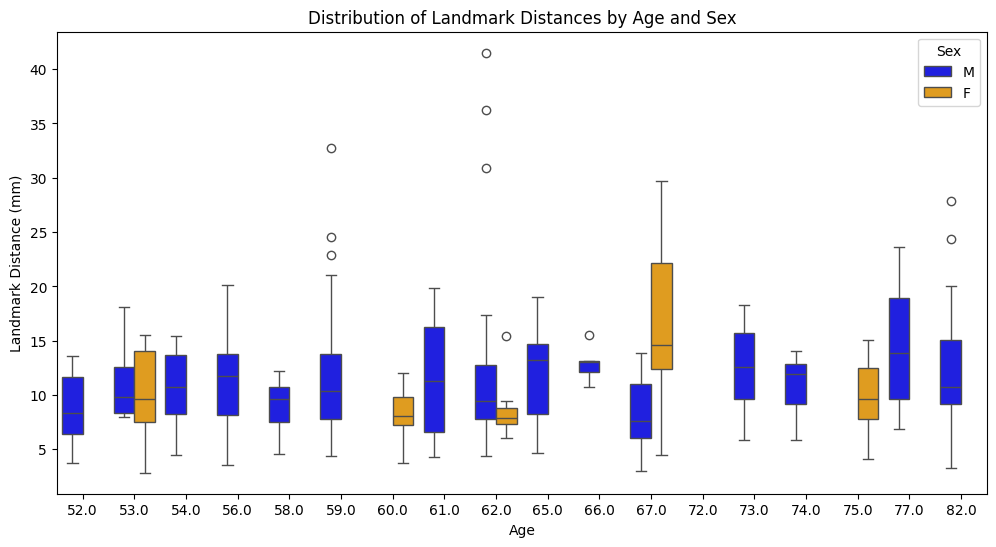

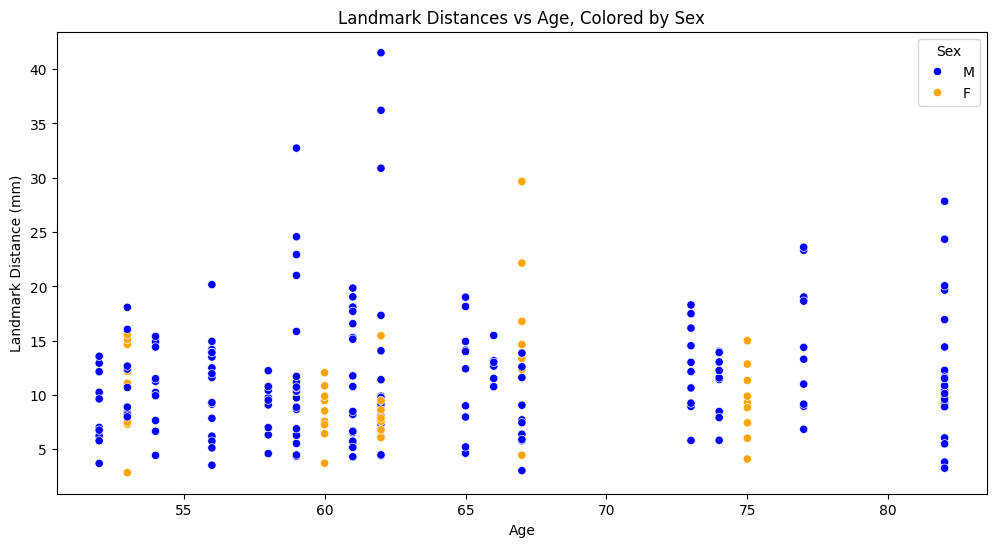

In [7]:
# Combine all CHUM dataframes
combined_chum_data = pd.concat(chum_data.values())

# Combine all HGJ dataframes
combined_hgj_data = pd.concat(hgj_data.values())

# Combine all HMR dataframes
combined_hmr_data = pd.concat(hmr_data.values())

# Combine all Olivetti dataframes
combined_olivetti_data = pd.concat(olivetti_data.values())

# Combine CHUM, HGJ, and Olivetti dataframes into one
combined_data = pd.concat([combined_chum_data, combined_hgj_data, combined_hmr_data, combined_olivetti_data], ignore_index=True)

# Group by age and sex and calculate summary statistics
grouped_stats = combined_data.groupby(['Age', 'Sex'])['Distance_mm'].describe()

# Define a color palette with blue for males and orange for females
palette = {'M': 'blue', 'F': 'orange'}

# Box plot for distribution of distances by age and sex
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age', y='Distance_mm', hue='Sex', data=combined_data, palette=palette)
plt.title('Distribution of Landmark Distances by Age and Sex')
plt.xlabel('Age')
plt.ylabel('Landmark Distance (mm)')
plt.legend(title='Sex')
plt.show()

# Scatter plot for relationship between age and landmark distances
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='Distance_mm', hue='Sex', data=combined_data, palette=palette)
plt.title('Landmark Distances vs Age, Colored by Sex')
plt.xlabel('Age')
plt.ylabel('Landmark Distance (mm)')
plt.legend(title='Sex')
plt.show()


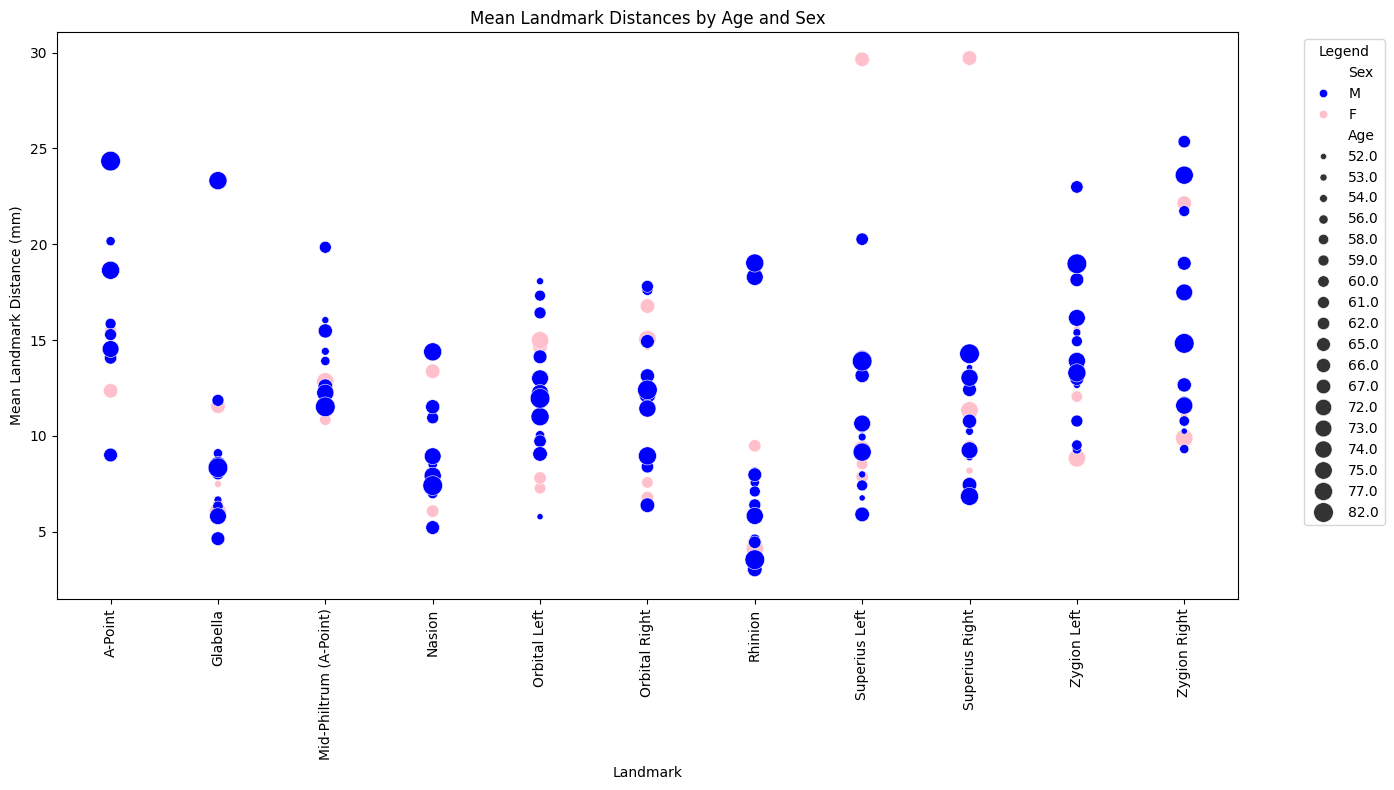

In [8]:
# Extract unique landmark points
landmarks = combined_data['Landmark'].unique()

# Calculate mean distances for each landmark
mean_distances = combined_data.groupby(['Landmark', 'Sex', 'Age']).agg({'Distance_mm': 'mean'}).reset_index()

# Create scatter plot with landmarks on the x-axis
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Landmark', y='Distance_mm', hue='Sex', size='Age', data=mean_distances, palette={'F': 'pink', 'M': 'blue'}, sizes=(20, 200), legend='full')
plt.title('Mean Landmark Distances by Age and Sex')
plt.xlabel('Landmark')
plt.ylabel('Mean Landmark Distance (mm)')
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Regression

Number of unique patients: 38
Initial shape of combined data: (360, 45)
Unique values in 'Sex' column: ['M' 'F' nan]
Unique values in 'Age' column: [82. 56. 62. 67. 61. 59. 72. 77. 73. 74. 53. 65. 54. 66. 52. 75. 60. 58.
 nan]
Missing values before handling:
Landmark                                        0
Distance_mm                                    11
PatientID                                       0
Patient #                                     111
Sex                                           111
Age                                           111
Primary Site                                  111
T-stage                                       111
N-stage                                       111
M-stage                                       111
TNM group stage                               129
HPV status                                    302
Time – diagnosis to diagnosis (days)          111
Time – diagnosis to PET (days)                111
Time – diagnosis to CT sim (days)        

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['Unnamed: 23' 'Unnamed: 24' 'Unnamed: 25' 'Unnamed: 1' 'Unnamed: 3'
 'Unnamed: 5' 'Unnamed: 7' 'Unnamed: 8' 'Unnamed: 10' 'Unnamed: 11'
 'Unnamed: 12']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['Unnamed: 23' 'Unnamed: 24' 'Unnamed: 25' 'Unnamed: 1' 'Unnamed: 3'
 'Unnamed: 5' 'Unnamed: 7' 'Unnamed: 8' 'Unnamed: 10' 'Unnamed: 11'
 'Unnamed: 12']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed val

Sex Prediction - Accuracy: 1.0
Sex Prediction - Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        65
         1.0       1.00      1.00      1.00         7

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



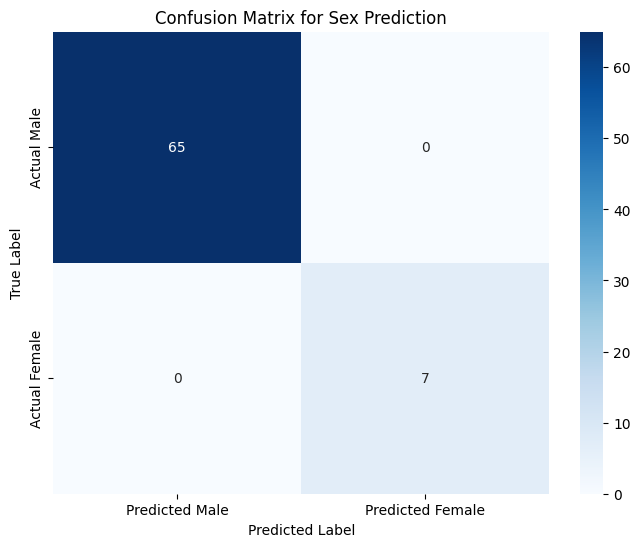

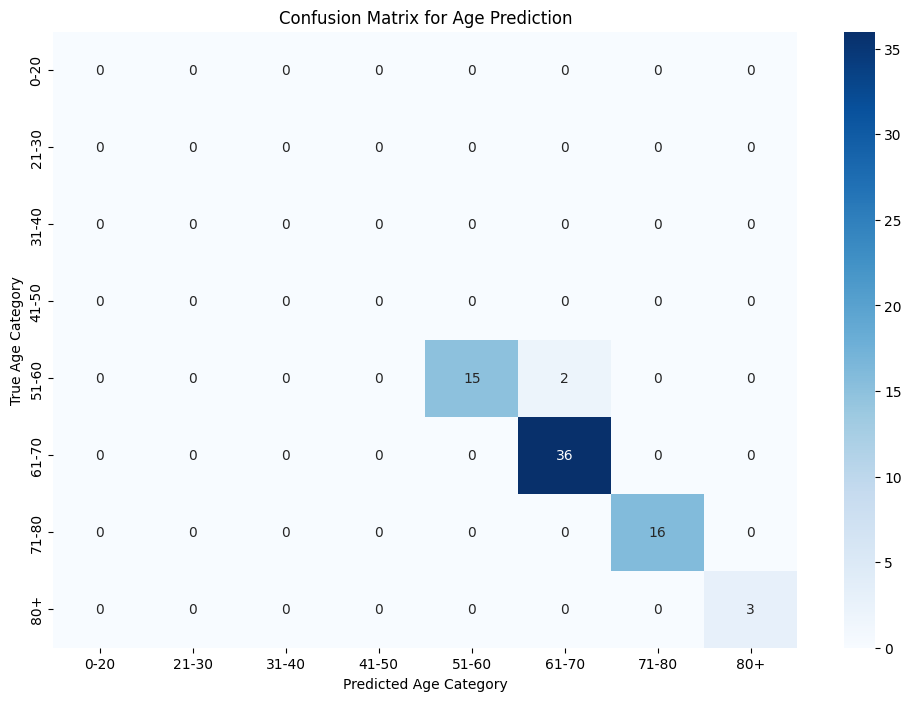

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Combine all dataframes into one
combined_data = pd.concat([combined_chum_data, combined_hgj_data, combined_hmr_data, combined_olivetti_data], ignore_index=True)

# Check for duplicate rows
combined_data = combined_data.drop_duplicates()

# Verify the number of unique patients
print(f"Number of unique patients: {combined_data['PatientID'].nunique()}")

# Check the initial shape of the combined data
print("Initial shape of combined data:", combined_data.shape)

# Check for unique values in 'Sex' and 'Age' columns
unique_sex_values = combined_data['Sex'].unique()
unique_age_values = combined_data['Age'].unique()
print("Unique values in 'Sex' column:", unique_sex_values)
print("Unique values in 'Age' column:", unique_age_values)

# Check for missing values before handling
print("Missing values before handling:")
print(combined_data.isnull().sum())

# Handle missing values
combined_data['Sex'] = combined_data['Sex'].replace({'M': 0, 'F': 1})
combined_data['Sex'] = combined_data['Sex'].fillna(combined_data['Sex'].mode()[0])
combined_data['Age'] = combined_data['Age'].fillna(combined_data['Age'].mean())

# Re-check unique values after handling missing values
unique_sex_values_after = combined_data['Sex'].unique()
unique_age_values_after = combined_data['Age'].unique()
print("Unique values in 'Sex' column after handling:", unique_sex_values_after)
print("Unique values in 'Age' column after handling:", unique_age_values_after)

# Select features and target variables
features = combined_data.drop(columns=['PatientID', 'Age', 'Sex'])
target_age = combined_data['Age']
target_sex = combined_data['Sex']

# Split the data into training and test sets for age prediction
X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(features, target_age, test_size=0.2, random_state=42)

# Split the data into training and test sets for sex prediction
X_train_sex, X_test_sex, y_train_sex, y_test_sex = train_test_split(features, target_sex, test_size=0.2, random_state=42)

# Verify the split data
print("Total rows before split:", combined_data.shape[0])
print("Rows in training set for age:", X_train_age.shape[0])
print("Rows in test set for age:", X_test_age.shape[0])
print("Rows in training set for sex:", X_train_sex.shape[0])
print("Rows in test set for sex:", X_test_sex.shape[0])

# Separate numeric and non-numeric features
numeric_features = features.select_dtypes(include=['int64', 'float64']).columns
non_numeric_features = features.select_dtypes(exclude=['int64', 'float64']).columns

# Define preprocessing for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Define preprocessing for non-numeric features
non_numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', non_numeric_transformer, non_numeric_features)])

# Age Prediction (Regression)
age_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', LinearRegression())])

age_pipeline.fit(X_train_age, y_train_age)
y_pred_age = age_pipeline.predict(X_test_age)

mse = mean_squared_error(y_test_age, y_pred_age)
r2 = r2_score(y_test_age, y_pred_age)
print(f'Age Prediction - Mean Squared Error: {mse}')
print(f'Age Prediction - R-squared: {r2}')

# Sex Prediction (Classification)
sex_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', RandomForestClassifier(random_state=42))])

sex_pipeline.fit(X_train_sex, y_train_sex)
y_pred_sex = sex_pipeline.predict(X_test_sex)

accuracy = accuracy_score(y_test_sex, y_pred_sex)
classification_rep = classification_report(y_test_sex, y_pred_sex)
print(f'Sex Prediction - Accuracy: {accuracy}')
print('Sex Prediction - Classification Report:')
print(classification_rep)

# Calculate confusion matrix for sex prediction
conf_matrix = confusion_matrix(y_test_sex, y_pred_sex)

# Plot confusion matrix for sex prediction
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Male', 'Predicted Female'], yticklabels=['Actual Male', 'Actual Female'])
plt.title('Confusion Matrix for Sex Prediction')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Define age bins
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, np.inf]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '80+']

# Categorize actual and predicted ages
y_test_age_binned = pd.cut(y_test_age, bins=age_bins, labels=age_labels)
y_pred_age_binned = pd.cut(y_pred_age, bins=age_bins, labels=age_labels)

# Calculate confusion matrix for age prediction
conf_matrix_age = confusion_matrix(y_test_age_binned, y_pred_age_binned, labels=age_labels)

# Plot confusion matrix for age prediction
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_age, annot=True, fmt='d', cmap='Blues', xticklabels=age_labels, yticklabels=age_labels)
plt.title('Confusion Matrix for Age Prediction')
plt.xlabel('Predicted Age Category')
plt.ylabel('True Age Category')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

Sex Prediction - Accuracy: 0.875
Sex Prediction - Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93         7
         1.0       0.00      0.00      0.00         1

    accuracy                           0.88         8
   macro avg       0.44      0.50      0.47         8
weighted avg       0.77      0.88      0.82         8

Age Bin Prediction - Accuracy: 0.5
Age Bin Prediction - Classification Report:
              precision    recall  f1-score   support

       51-60       0.60      0.60      0.60         5
       61-70       0.33      0.50      0.40         2
       71-80       0.00      0.00      0.00         1

    accuracy                           0.50         8
   macro avg       0.31      0.37      0.33         8
weighted avg       0.46      0.50      0.47         8



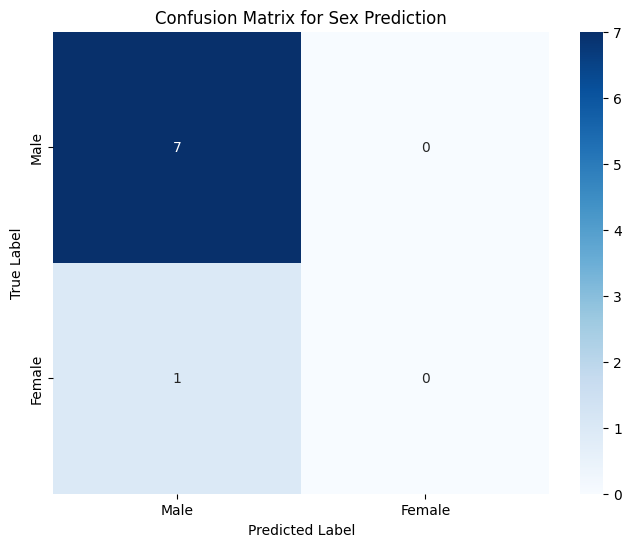

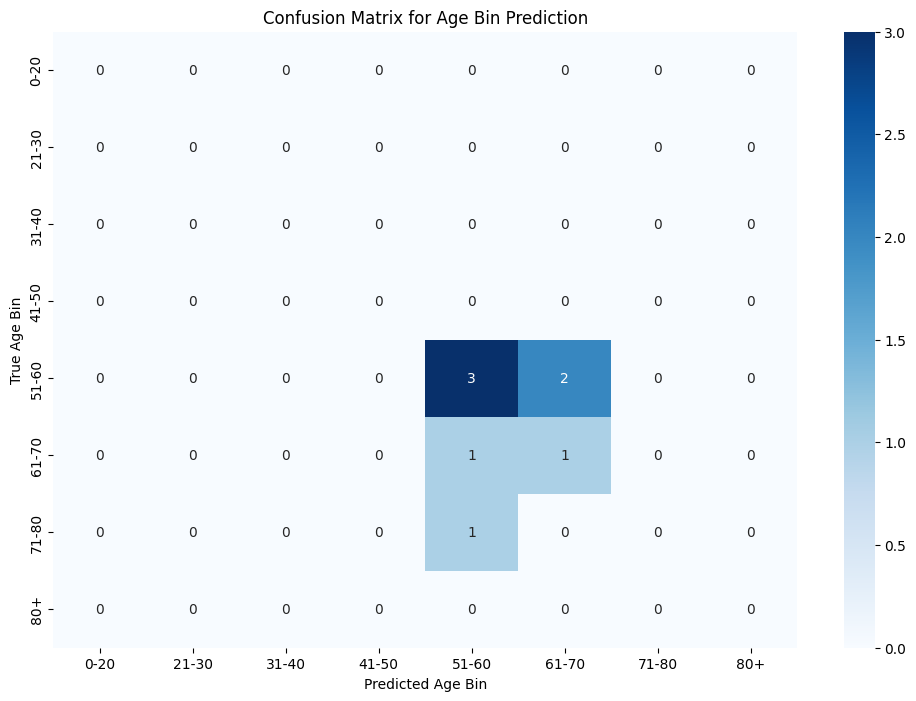

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Combine all dataframes into one
combined_data = pd.concat([combined_chum_data, combined_hgj_data, combined_hmr_data, combined_olivetti_data], ignore_index=True)

# Check for duplicate rows
combined_data = combined_data.drop_duplicates()

# Group by PatientID and aggregate landmark distances into a single row per patient
patient_landmarks = combined_data.pivot_table(index='PatientID', columns='Landmark', values='Distance_mm')

# Reset the index to make 'PatientID' a column
patient_landmarks.reset_index(inplace=True)

# Merge aggregated landmarks with age and sex
patient_info = combined_data[['PatientID', 'Age', 'Sex']].drop_duplicates()
patient_data = patient_landmarks.merge(patient_info, on='PatientID')

# Encode sex
patient_data['Sex'] = patient_data['Sex'].replace({'M': 0, 'F': 1})

# Define age bins
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, np.inf]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '80+']

# Categorize age
patient_data['AgeBin'] = pd.cut(patient_data['Age'], bins=age_bins, labels=age_labels)

# Handle missing values in the target variables
patient_data['Sex'] = patient_data['Sex'].fillna(patient_data['Sex'].mode()[0])
patient_data['AgeBin'] = patient_data['AgeBin'].fillna(patient_data['AgeBin'].mode()[0])

# Select features and target variables
features = patient_data.drop(columns=['PatientID', 'Age', 'Sex', 'AgeBin'])
target_sex = patient_data['Sex']
target_age_bin = patient_data['AgeBin']

# Use stratified sampling to ensure both male and female patients are present in both training and test sets
X_train_sex, X_test_sex, y_train_sex, y_test_sex = train_test_split(features, target_sex, test_size=0.2, random_state=0, stratify=target_sex)
X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(features, target_age_bin, test_size=0.2, random_state=0, stratify=target_age_bin)

# Train a model for sex prediction
sex_model = RandomForestClassifier(random_state=0)
sex_model.fit(X_train_sex, y_train_sex)
y_pred_sex = sex_model.predict(X_test_sex)

# Evaluate the sex prediction model
sex_accuracy = accuracy_score(y_test_sex, y_pred_sex)
sex_report = classification_report(y_test_sex, y_pred_sex)
print(f'Sex Prediction - Accuracy: {sex_accuracy}')
print('Sex Prediction - Classification Report:')
print(sex_report)

# Train a model for age bin prediction
age_model = RandomForestClassifier(random_state=0)
age_model.fit(X_train_age, y_train_age)
y_pred_age = age_model.predict(X_test_age)

# Evaluate the age bin prediction model
age_accuracy = accuracy_score(y_test_age, y_pred_age)
age_report = classification_report(y_test_age, y_pred_age)
print(f'Age Bin Prediction - Accuracy: {age_accuracy}')
print('Age Bin Prediction - Classification Report:')
print(age_report)

# Plot confusion matrix for sex prediction
conf_matrix_sex = confusion_matrix(y_test_sex, y_pred_sex)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_sex, annot=True, fmt='d', cmap='Blues', xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female'])
plt.title('Confusion Matrix for Sex Prediction')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot confusion matrix for age bin prediction
conf_matrix_age = confusion_matrix(y_test_age, y_pred_age, labels=age_labels)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_age, annot=True, fmt='d', cmap='Blues', xticklabels=age_labels, yticklabels=age_labels)
plt.title('Confusion Matrix for Age Bin Prediction')
plt.xlabel('Predicted Age Bin')
plt.ylabel('True Age Bin')
plt.show()


In [12]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Assuming the data is already loaded into the following variables
# combined_chum_data, combined_hgj_data, combined_hmr_data, combined_olivetti_data

# Combine all dataframes into one
combined_data = pd.concat([combined_chum_data, combined_hgj_data, combined_hmr_data, combined_olivetti_data], ignore_index=True)

# Handle missing values and encode 'Sex' column
combined_data['Sex'] = combined_data['Sex'].replace({'M': 0, 'F': 1})
combined_data['Sex'] = combined_data['Sex'].fillna(combined_data['Sex'].mode()[0])
combined_data['Age'] = combined_data['Age'].fillna(combined_data['Age'].mean())

# Extract landmark columns
landmark_cols = combined_data['Landmark'].unique()
landmark_df = combined_data.pivot_table(index='PatientID', columns='Landmark', values='Distance_mm').reset_index()

# Merge with demographic data
patient_info = combined_data[['PatientID', 'Age', 'Sex']].drop_duplicates()
final_df = pd.merge(landmark_df, patient_info, on='PatientID')

# Prepare data for correlation analysis
results = {}

for landmark in landmark_cols:
    if landmark in final_df.columns:
        y = final_df[landmark].dropna()  # Drop NA values for the specific landmark
        X_landmark = final_df.loc[y.index, ['Age', 'Sex']]  # Select corresponding X values
        
        age_corr, _ = pearsonr(X_landmark['Age'], y)
        sex_corr, _ = pearsonr(X_landmark['Sex'], y)
        
        results[landmark] = {'Age_Corr': age_corr, 'Sex_Corr': sex_corr}

# Convert results to DataFrame
results_df = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Landmark'})

# Display the results
print(results_df)

# Save results to a CSV file
# results_df.to_csv('landmark_pearson_correlation_results.csv', index=False)

                  Landmark  Age_Corr  Sex_Corr
0                 Glabella  0.200501 -0.040476
1                   Nasion  0.126079 -0.048628
2            Orbital Right -0.027138  0.129759
3             Orbital Left -0.002361  0.084006
4           Superius Right  0.149363  0.257181
5            Superius Left  0.182128  0.131966
6             Zygion Right  0.099982 -0.090677
7              Zygion Left  0.122740 -0.116893
8                  Rhinion  0.176872 -0.094753
9                  A-Point  0.207151 -0.236666
10  Mid-Philtrum (A-Point) -0.183318 -0.351269
